# Proyek Analisis Data: [Bike Sharing]
- **Nama:** [Sheina Azima]
- **Email:** [sheizana09@gmail.com]
- **ID Dicoding:** [sheinaazima]

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Berapa perbandingan jumlah Casual User dan Registered User dalam 12 Bulan?
- Pertanyaan 2 : Berapa jumlah penggunaan Bike Sharing dalam 24 Jam selama 12 Bulan?
- Pertanyaan 3 : Berapa jumlah penggunaan Bike Sharing dalam 24 Jam selama 12 Bulan?

## Import Semua Packages/Library yang Digunakan

In [229]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

## Data Wrangling (Pengumpulan Data)

### Gathering Data

In [230]:
day = pd.read_csv('data/day.csv')
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [231]:
hour = pd.read_csv('data/hour.csv')
hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Gathering data berfungsi mengumpulkan dari berbagai sumber dan mendapatkan dataset yang diperlukan untuk melakukan analisis yaitu dari dataset csv "day" dan "hour" pada folder data.
- Dataset **day.csv** berisi dataset per-hari, sedangkan dataset **hour.csv** berisi dataset per-jam.

### Assessing Data (Pemeriksaan Data)

**Informasi Variabel Dataset**
- instant: Indeks pencatatan
- dteday : Tanggal
- season : Musim (1:spring, 2:summer, 3:fall, 4:winter)
- yr : Tahun (0: 2011, 1:2012)
- mnth : Bulan ( 1 to 12)
- hr : Jam (0 to 23)
- holiday : Hari libur
- weekday : Hari dalam seminggu
- workingday : jika bukan akhir pekan atau hari libur, bernilai 1; jika akhir pekan atau hari libur, bernilai 0.
- weathersit : Kondisi cuaca
     - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
     - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
     - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
     - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow+ Fog
- temp : Suhu dalam Celsius. Nilai dihitung dengan rumus (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (hanya dalam skala jam)
- atemp: Suhu terasa dalam Celsius yang telah dinormalisasi. Nilai dihitung dengan rumus (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (hanya dalam skala jam)
- hum: Kelembaban yang dinormalisasi. Nilai dibagi dengan 100 (maksimal)
- windspeed: Kecepatan angin yang dinormalisasi. Nilai dibagi dengan 67 (maksimal)
- casual: Pengguna tidak terdaftar
- registered: Pengguna terdaftar
- cnt: Total sepeda yang disewa casual maupun registered.

### Day Dataframe

In [232]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Mengidentifikasi baris duplikat dalam DataFrame "Day", di mana baris yang terdeteksi sebagai duplikat akan diberi label True, sedangkan baris lainnya akan diberi label False.

In [233]:
print('Number of duplications: ', day.duplicated().sum())
day.describe()

Number of duplications:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### Hour Dataframe

In [234]:
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Mengidentifikasi baris duplikat di dalam DataFrame "Hour", di mana baris-baris yang terdeteksi sebagai duplikat akan diberi nilai True, sementara baris lainnya diberi nilai False.

In [235]:
print('Number of duplications: ', hour.duplicated().sum())
hour.describe()

Number of duplications:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

### DataFrame Day
Menghapus kolom "holiday" karena informasi yang terdapat di kolom tersebut sudah tercakup dalam kolom "workingday", di mana nilainya terdiri dari:
- 1 (hari kerja)
- 0 (hari libur)

In [236]:
day.drop(['holiday'], axis=1, inplace=True)

Mengubah beberapa judul kolom header agar lebih mudah dimengerti dan untuk mencegah terjadinya kesalahan.

In [237]:
day.rename(columns={'dteday':'date', 'yr':'year', 'mnth':'month', 'weekday':'day', 'weathersit':'weather',
                    'temp':'temperature', 'atemp':'temperature_feel', 'hum':'humidity', 'casual':'casual_user',
                    'registered':'registered_user', 'cnt':'total_user'}, inplace=True)

Mengubah tipe data kolom "date" dari objek menjadi datetime.

In [238]:
datetime_columns = ['date']

for column in datetime_columns:
  day[column] = pd.to_datetime(day[column])

In [239]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   instant           731 non-null    int64         
 1   date              731 non-null    datetime64[ns]
 2   season            731 non-null    int64         
 3   year              731 non-null    int64         
 4   month             731 non-null    int64         
 5   day               731 non-null    int64         
 6   workingday        731 non-null    int64         
 7   weather           731 non-null    int64         
 8   temperature       731 non-null    float64       
 9   temperature_feel  731 non-null    float64       
 10  humidity          731 non-null    float64       
 11  windspeed         731 non-null    float64       
 12  casual_user       731 non-null    int64         
 13  registered_user   731 non-null    int64         
 14  total_user        731 non-

Mengonversi nilai "season" dari format numerik ke representasi yang lebih jelas. Setiap angka merepresentasikan:
- 1 : Spring
- 2 : Summer
- 3 : Fall
- 4 : Winter

In [240]:
def change_season(x):
    if x == 1:
        return 'Spring'
    elif x == 2:
        return 'Summer'
    elif x == 3:
        return 'Fall'
    else:
        return 'Winter'

day['season'] = day['season'].apply(change_season)
day.head()

,instant,date,season,year,month,day,workingday,weather,temperature,temperature_feel,humidity,windspeed,casual_user,registered_user,total_user
0,1,2011-01-01,Spring,0,1,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,0,1,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,0,1,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,0,1,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,0,1,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Mengubah nilai "year" dari format numerik menjadi nama tahun yang sebenarnya:
- 0 = 2011
- 1 = 2012

In [273]:
def change_year(x):
    if x == 0:
        return 2011
    else:
        return 2012

day['year'] = day['year'].apply(change_year)
day.head()

,instant,date,season,year,month,day,workingday,weather,temperature,temperature_feel,humidity,windspeed,casual_user,registered_user,total_user
0,1,2011-01-01,Spring,2012,January,Sunday,weekend/holiday,Mist,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2012,January,Monday,weekend/holiday,Mist,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2012,January,Tuesday,working day,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2012,January,Wednesday,working day,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2012,January,Thursday,working day,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Mengganti nilai kolom "month" dari format numerik (1-12) menjadi nama bulan yang relevan.

In [274]:
month_change = {1: 'January', 2: 'February', 3: 'March', 4:'April', 5:'May', 6:'June', 7:'July',
                8:'August', 9:'September', 10:'October', 11:'November', 12:'December'}

day['month'] = day['month'].map(month_change)
day.head(5)

,instant,date,season,year,month,day,workingday,weather,temperature,temperature_feel,humidity,windspeed,casual_user,registered_user,total_user
0,1,2011-01-01,Spring,2012,NaN,Sunday,weekend/holiday,Mist,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2012,NaN,Monday,weekend/holiday,Mist,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2012,NaN,Tuesday,working day,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2012,NaN,Wednesday,working day,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2012,NaN,Thursday,working day,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Mengubah data "weekday" menjadi nama hari yang sebenarnya.

In [243]:
day_change = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}

day['day'] = day['day'].map(day_change)
day.head(5)

,instant,date,season,year,month,day,workingday,weather,temperature,temperature_feel,humidity,windspeed,casual_user,registered_user,total_user
0,1,2011-01-01,Spring,2004,January,Sunday,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2004,January,Monday,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2004,January,Tuesday,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2004,January,Wednesday,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2004,January,Thursday,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Mengonversi data pada kolom "working days" yang sebelumnya berupa angka (1/0) menjadi:
- 0 = weekend/libur
- 1 = hari kerja.

In [244]:
def change_workingday(x):
    if x == 0:
        return 'weekend/holiday'
    else:
        return 'working day'

day['workingday'] = day['workingday'].apply(change_workingday)
day.head()

,instant,date,season,year,month,day,workingday,weather,temperature,temperature_feel,humidity,windspeed,casual_user,registered_user,total_user
0,1,2011-01-01,Spring,2004,January,Sunday,weekend/holiday,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2004,January,Monday,weekend/holiday,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2004,January,Tuesday,working day,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2004,January,Wednesday,working day,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2004,January,Thursday,working day,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Mengonversi data "weather" menjadi representasi yang sesuai:
- 1 = Clear
- 2 = Mist
- 3 = Light Snow
- 4 = Heavy Rain.

In [245]:
def change_weather(x):
    if x == 1:
        return 'Clear'
    elif x == 2:
        return 'Mist'
    elif x == 3:
        return 'Light Snow'
    else:
        return 'Heavy Rain'

day['weather'] = day['weather'].apply(change_weather)
day.head()

,instant,date,season,year,month,day,workingday,weather,temperature,temperature_feel,humidity,windspeed,casual_user,registered_user,total_user
0,1,2011-01-01,Spring,2004,January,Sunday,weekend/holiday,Mist,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2004,January,Monday,weekend/holiday,Mist,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2004,January,Tuesday,working day,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2004,January,Wednesday,working day,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2004,January,Thursday,working day,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### DataFrame Hour 
Menghapus kolom "holiday" karena informasi dalam kolom tersebut sudah tercakup dalam kolom "workingday," di mana nilainya adalah:
- 1 (hari kerja)
- 0 (hari libur).

In [246]:
hour.drop(['holiday'], axis=1, inplace=True)

Mengubah beberapa judul kolom header agar lebih mudah dimengerti dan untuk mencegah kesalahan.

In [247]:
hour.rename(columns={'dteday':'date', 'yr':'year', 'mnth':'month', 'hr':'hour', 'weekday':'day',
                    'weathersit':'weather', 'temp':'temperature', 'atemp':'temperature_feel',
                    'hum':'humidity', 'casual':'casual_user', 'registered':'registered_user', 'cnt':'total_user'}, inplace=True)

Mengonversi tipe data kolom "date" dari objek menjadi datetime.

In [248]:
datetime_columns = ['date']

for column in datetime_columns:
  hour[column] = pd.to_datetime(hour[column])

In [249]:
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   instant           17379 non-null  int64         
 1   date              17379 non-null  datetime64[ns]
 2   season            17379 non-null  int64         
 3   year              17379 non-null  int64         
 4   month             17379 non-null  int64         
 5   hour              17379 non-null  int64         
 6   day               17379 non-null  int64         
 7   workingday        17379 non-null  int64         
 8   weather           17379 non-null  int64         
 9   temperature       17379 non-null  float64       
 10  temperature_feel  17379 non-null  float64       
 11  humidity          17379 non-null  float64       
 12  windspeed         17379 non-null  float64       
 13  casual_user       17379 non-null  int64         
 14  registered_user   1737

Mengubah nilai "season" dari format numerik (1-4) menjadi makna yang sebenarnya. Setiap angka merepresentasikan:
- 1 = Spring
- 2 = Summer
- 3 = Fall
- 4 = Winter

In [250]:
def change_season(x):
    if x == 1:
        return 'Spring'
    elif x == 2:
        return 'Summer'
    elif x == 3:
        return 'Fall'
    else:
        return 'Winter'

hour['season'] = hour['season'].apply(change_season)
hour.head()

,instant,date,season,year,month,hour,day,workingday,weather,temperature,temperature_feel,humidity,windspeed,casual_user,registered_user,total_user
0,1,2011-01-01,Spring,0,1,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,0,1,1,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,0,1,2,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,0,1,3,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,0,1,4,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Mengonversi data "year" menjadi representasi tahun yang sesuai:
- 0 = 2011
- 1 = 2012

In [251]:
def change_year(x):
    if x == 0:
        return 2011
    else:
        return 2012

hour['year'] = hour['year'].apply(change_year)
hour.head()

,instant,date,season,year,month,hour,day,workingday,weather,temperature,temperature_feel,humidity,windspeed,casual_user,registered_user,total_user
0,1,2011-01-01,Spring,2011,1,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,2011,1,1,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,2011,1,2,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,2011,1,3,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,2011,1,4,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Mengubah data "month" dengan nama bulan yang sesuai.

In [252]:
month_change = {1: 'January', 2: 'February', 3: 'March', 4:'April', 5:'May', 6:'June', 7:'July',
                8:'August', 9:'September', 10:'October', 11:'November', 12:'December'}

hour['month'] = hour['month'].map(month_change)
hour.head(5)

,instant,date,season,year,month,hour,day,workingday,weather,temperature,temperature_feel,humidity,windspeed,casual_user,registered_user,total_user
0,1,2011-01-01,Spring,2011,January,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,2011,January,1,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,2011,January,2,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,2011,January,3,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,2011,January,4,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Mengonversi data "weekday" menjadi nama hari yang tepat.

In [253]:
day_change = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}

hour['day'] = hour['day'].map(day_change)
hour.head(5)

,instant,date,season,year,month,hour,day,workingday,weather,temperature,temperature_feel,humidity,windspeed,casual_user,registered_user,total_user
0,1,2011-01-01,Spring,2011,January,0,Sunday,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,2011,January,1,Sunday,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,2011,January,2,Sunday,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,2011,January,3,Sunday,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,2011,January,4,Sunday,0,1,0.24,0.2879,0.75,0.0,0,1,1


Mengonversi data pada "Working Days" yang awalnya berupa angka, agar makna dari data tersebut dapat disajikan.

In [254]:
def change_workingday(x):
    if x == 0:
        return 'weekend/holiday'
    else:
        return 'working day'

hour['workingday'] = hour['workingday'].apply(change_workingday)
hour.head()

,instant,date,season,year,month,hour,day,workingday,weather,temperature,temperature_feel,humidity,windspeed,casual_user,registered_user,total_user
0,1,2011-01-01,Spring,2011,January,0,Sunday,weekend/holiday,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,2011,January,1,Sunday,weekend/holiday,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,2011,January,2,Sunday,weekend/holiday,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,2011,January,3,Sunday,weekend/holiday,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,2011,January,4,Sunday,weekend/holiday,1,0.24,0.2879,0.75,0.0,0,1,1


Mengonversi data "weather" menjadi representasi kondisi cuaca yang sebenarnya.

In [255]:
def change_weather(x):
    if x == 1:
        return 'Clear'
    elif x == 2:
        return 'Mist'
    elif x == 3:
        return 'Light Snow'
    else:
        return 'Heavy Rain'

hour['weather'] = hour['weather'].apply(change_weather)
hour.head()

,instant,date,season,year,month,hour,day,workingday,weather,temperature,temperature_feel,humidity,windspeed,casual_user,registered_user,total_user
0,1,2011-01-01,Spring,2011,January,0,Sunday,weekend/holiday,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,2011,January,1,Sunday,weekend/holiday,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,2011,January,2,Sunday,weekend/holiday,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,2011,January,3,Sunday,weekend/holiday,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,2011,January,4,Sunday,weekend/holiday,Clear,0.24,0.2879,0.75,0.0,0,1,1


## Exploratory Data Analysis (EDA)

### Day Dataframe

In [256]:
day.describe(include="all")

C:\Users\User\AppData\Local\Temp\ipykernel_2780\4066268591.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  day.describe(include="all")


,instant,date,season,year,month,day,workingday,weather,temperature,temperature_feel,humidity,windspeed,casual_user,registered_user,total_user
count,731.000000,731,731,731.000000,731,731,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,4,NaN,12,7,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,Fall,NaN,January,Sunday,working day,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,188,NaN,62,105,500,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,NaN,2004.500684,NaN,NaN,NaN,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,NaN,0.500342,NaN,NaN,NaN,NaN,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,NaN,2004.000000,NaN,NaN,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,NaN,2004.000000,NaN,NaN,NaN,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000


Berdasarkan data "day.csv", hasil menunjukkan bahwa mayoritas pengguna lebih sering memanfaatkan layanan Bike Sharing pada musim "autumn" (gugur).

**Number of Daily Users**

In [257]:
day.groupby(by="day").agg({
    "date": "nunique",
    "casual_user": "sum",
    "registered_user": "sum",
    "total_user": ["max", "min", "mean", "sum"]
})

date casual_user registered_user total_user                     \
          nunique         sum             sum        max   min         mean   
day                                                                           
Friday        104       61460          423935       7804   431  4667.259615   
Monday        105      140521          303506       8227   605  4228.828571   
Saturday      104       78238          409552       8362  1167  4690.288462   
Sunday        105      153852          323955       8714   627  4550.542857   
Thursday      104       57319          415729       8173   441  4548.538462   
Tuesday       105       70784          384719       7525    22  4338.123810   
Wednesday     104       57843          411266       7767   683  4510.663462   

                   
              sum  
day                
Friday     485395  
Monday     444027  
Saturday   487790  
Sunday     477807  
Thursday   473048  
Tuesday    455503  
Wednesday  469109

Berdasarkan data harian, jumlah pengguna Bike Sharing terbanyak tercatat pada hari "Saturday" (Sabtu), dengan rata-rata total 487.790 pengguna. Jumlah tersebut terdiri dari 78.238 casual users dan 409.552 registered users. Hal ini menunjukkan peningkatan signifikan dalam penggunaan layanan Bike Sharing pada hari Sabtu, kemungkinan besar disebabkan oleh hari libur dan aktivitas rekreasi.

**Hour Dataframe**

In [258]:
hour.describe(include="all")

C:\Users\User\AppData\Local\Temp\ipykernel_2780\720214054.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  hour.describe(include="all")


,instant,date,season,year,month,hour,day,workingday,weather,temperature,temperature_feel,humidity,windspeed,casual_user,registered_user,total_user
count,17379.0000,17379,17379,17379.000000,17379,17379.000000,17379,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,4,NaN,12,NaN,7,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,Fall,NaN,May,NaN,Sunday,working day,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,4496,NaN,1488,NaN,2512,11865,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,NaN,2011.502561,NaN,11.546752,NaN,NaN,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,NaN,0.500008,NaN,6.914405,NaN,NaN,NaN,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,NaN,2011.000000,NaN,0.000000,NaN,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,NaN,2011.000000,NaN,6.000000,NaN,NaN,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000


Berdasarkan data **hour.csv**, terlihat bahwa mayoritas pengguna lebih sering memanfaatkan layanan Bike Sharing selama musim "autumn" (gugur).

**Number of Users Every Hour Based on Working Days**

In [259]:
hour.groupby(by=["workingday", "hour"]).agg({
    "date": "nunique",
    "casual_user": "sum",
    "registered_user": "sum",
    "total_user": ["max", "min", "mean", "sum"]
})

date casual_user registered_user total_user      \
                     nunique         sum             sum        max min   
workingday      hour                                                      
weekend/holiday 0        230        3829           17055        249   6   
                1        230        2876           13111        168   4   
                2        228        2371            9752        132   2   
                3        227        1465            4386         79   2   
                4        227         514            1362         28   1   
                5        222         383            1546         55   1   
                6        229         875            3417        133   1   
                7        231        1988            8039        387   1   
                8        231        4718           19688        597   5   
                9        231       10399           29246        397  14   
                10       231       18311           40804        539  12   
                11       231       24637           48201        663  27   
                12       231       29163           55443        776  32   
                13       231       31514           54587        760  30   
                14       231       32246           51987        750  23   
                15       231       31532           51354        750   7   
                16       231       29710           51770        783  11   
                17       231       25829           48911        731  15   
                18       230       19371           45272        676  23   
                19       230       15076           38209        554  11   
                20       230       10756           29434        551  11   
                21       230        8314           24360        584   7   
                22       230        6453           20241        502   9   
                23       230        4402           15362        239   2   
working day     0        496        3546           14700        283   2   
                1        494        1833            6344        114   1   
                2        487        1041            3188         74   1   
                3        470         428            1895         36   1   
                4        470         360            2192         17   1   
                5        495         629           11703         66   1   
                6        496        2142           48698        213   7   
                7        496        6049          138095        596  18   
                8        496       11043          225552        839  31   
                9        496       12059          107734        426  23   
                10       496       15478           51664        275   8   
                11       496       18649           59833        361  10   
                12       497       20555           79253        471   3   
                13       498       21199           77619        428  11   
                14       498       22843           68576        651  12   
                15       498       23074           77189        601  13   
                16       499       24124          122144        634  13   
                17       499       28391          233729        976  26   
                18       498       25125          220004        977  26   
                19       498       20429          153075        743  18   
                20       498       15622          108738        567  23   
                21       498       12256           80515        398   6   
                22       498        9747           59171        321  11   
                23       498        6663           37514        256   9   

                                          
                            mean     sum  
workingday      hour                      
weekend/holiday 0      90.800000   20884  
                1      69.

Berdasarkan data per jam, pada weekends atau "holidays," jumlah pengguna tertinggi tercatat pada pukul 13.00 dengan total 86.101 pengguna. Sedangkan pada "weekdays," puncak aktivitas pengguna terjadi pada pukul 17.00 dengan total 262.120 pengguna.

**Number of Users by Weather and Season**

In [260]:
hour.groupby(by=["season", "weather"]).agg({
    "date": "nunique",
    "casual_user": "sum",
    "registered_user": "sum",
    "total_user": ["max", "min", "mean", "sum"]
})

date casual_user registered_user total_user      \
                  nunique         sum             sum        max min   
season weather                                                         
Fall   Clear          183      174014          627927        977   1   
       Light Snow      72        9727           36529        891   1   
       Mist           140       42350          170582        868   2   
Spring Clear          174       44462          280816        801   1   
       Heavy Rain       3           8             215        164  23   
       Light Snow      75        1392           20250        520   1   
       Mist           146       14760          109445        712   1   
Summer Clear          177      151197          513266        873   1   
       Light Snow      91        7413           39350        782   1   
       Mist           146       44912          162451        957   1   
Winter Clear          166       93072          453419        967   1   
       Light Snow      62        4251           39419        856   1   
       Mist           135       32459          218993        905   1   

                                       
                         mean     sum  
season weather                         
Fall   Clear       244.494207  801941  
       Light Snow  171.955390   46256  
       Mist        224.848997  212932  
Spring Clear       122.055535  325278  
       Heavy Rain   74.333333     223  
       Light Snow   58.650407   21642  
       Mist        103.074689  124205  
Summer Clear       232.410983  664463  
       Light Snow  115.179803   46763  
       Mist        181.261364  207363  
Winter Clear       209.463779  546491  
       Light Snow  116.453333   43670  
       Mist        201.483974  251452

Berdasarkan data "hour.csv", mayoritas pengguna aktif pada musim "autumn" saat cuaca cerah, dengan total 801.941 pengguna. Sebaliknya, jumlah pengguna paling sedikit tercatat pada musim "spring" saat terjadi hujan deras, dengan total hanya 223 pengguna.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Perbandingan Jumlah Casual User dan Registered User Bike Sharing dalam 7 Hari

**Casual Users**

In [261]:
sum_casual_user = day.groupby("day").casual_user.sum().sort_values(ascending=False).reset_index()
sum_casual_user

,day,casual_user
0,Sunday,153852
1,Monday,140521
2,Saturday,78238
3,Tuesday,70784
4,Friday,61460
5,Wednesday,57843
6,Thursday,57319


**Registered Users**

In [262]:
sum_registered_user = day.groupby("day").registered_user.sum().sort_values(ascending=False).reset_index()
sum_registered_user

,day,registered_user
0,Friday,423935
1,Thursday,415729
2,Wednesday,411266
3,Saturday,409552
4,Tuesday,384719
5,Sunday,323955
6,Monday,303506


In [263]:
daily_user = pd.merge(
    left=sum_casual_user,
    right=sum_registered_user,
    how="left",
    left_on="day",
    right_on="day"
)
daily_user

,day,casual_user,registered_user
0,Sunday,153852,323955
1,Monday,140521,303506
2,Saturday,78238,409552
3,Tuesday,70784,384719
4,Friday,61460,423935
5,Wednesday,57843,411266
6,Thursday,57319,415729


In [264]:
daily_user_type = daily_user.melt(id_vars='day', var_name='user_type', value_name='user_count')
daily_user_type

,day,user_type,user_count
0,Sunday,casual_user,153852
1,Monday,casual_user,140521
2,Saturday,casual_user,78238
3,Tuesday,casual_user,70784
4,Friday,casual_user,61460
5,Wednesday,casual_user,57843
6,Thursday,casual_user,57319
7,Sunday,registered_user,323955
8,Monday,registered_user,303506
9,Saturday,registered_user,409552


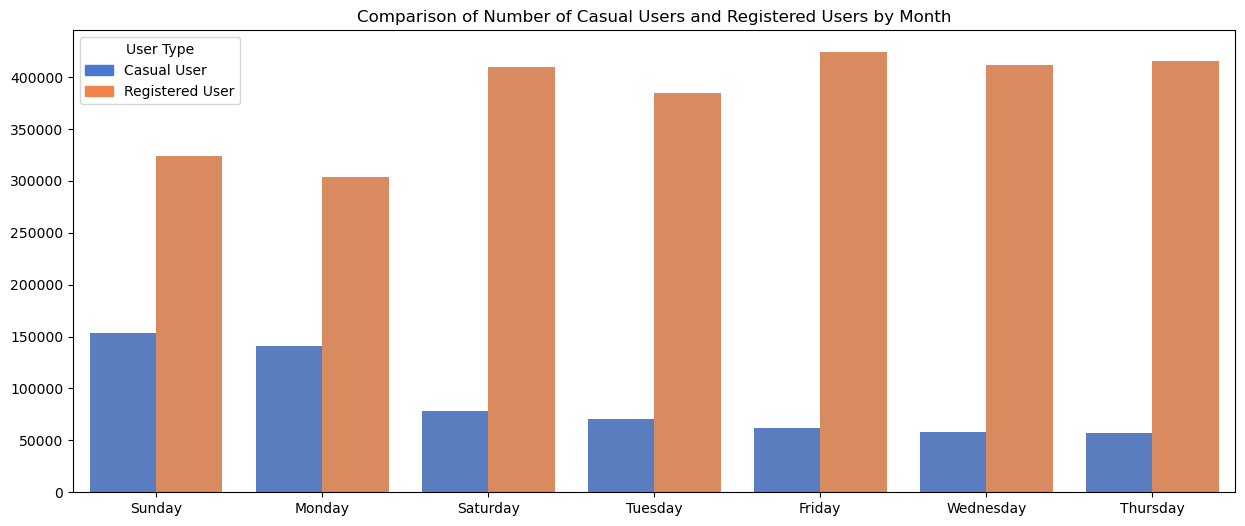

In [265]:
plt.figure(figsize=(15, 6))


sns.barplot(x="day", y="user_count", hue="user_type", data=daily_user_type, palette="muted")
plt.ylabel(None)
plt.xlabel(None)
plt.title("Comparison of Number of Casual Users and Registered Users by Month")
casual_patch = mpatches.Patch(color=sns.color_palette("muted")[0], label='Casual User')
registered_patch = mpatches.Patch(color=sns.color_palette("muted")[1], label='Registered User')
plt.legend(handles=[casual_patch, registered_patch], title="User Type")
plt.show()

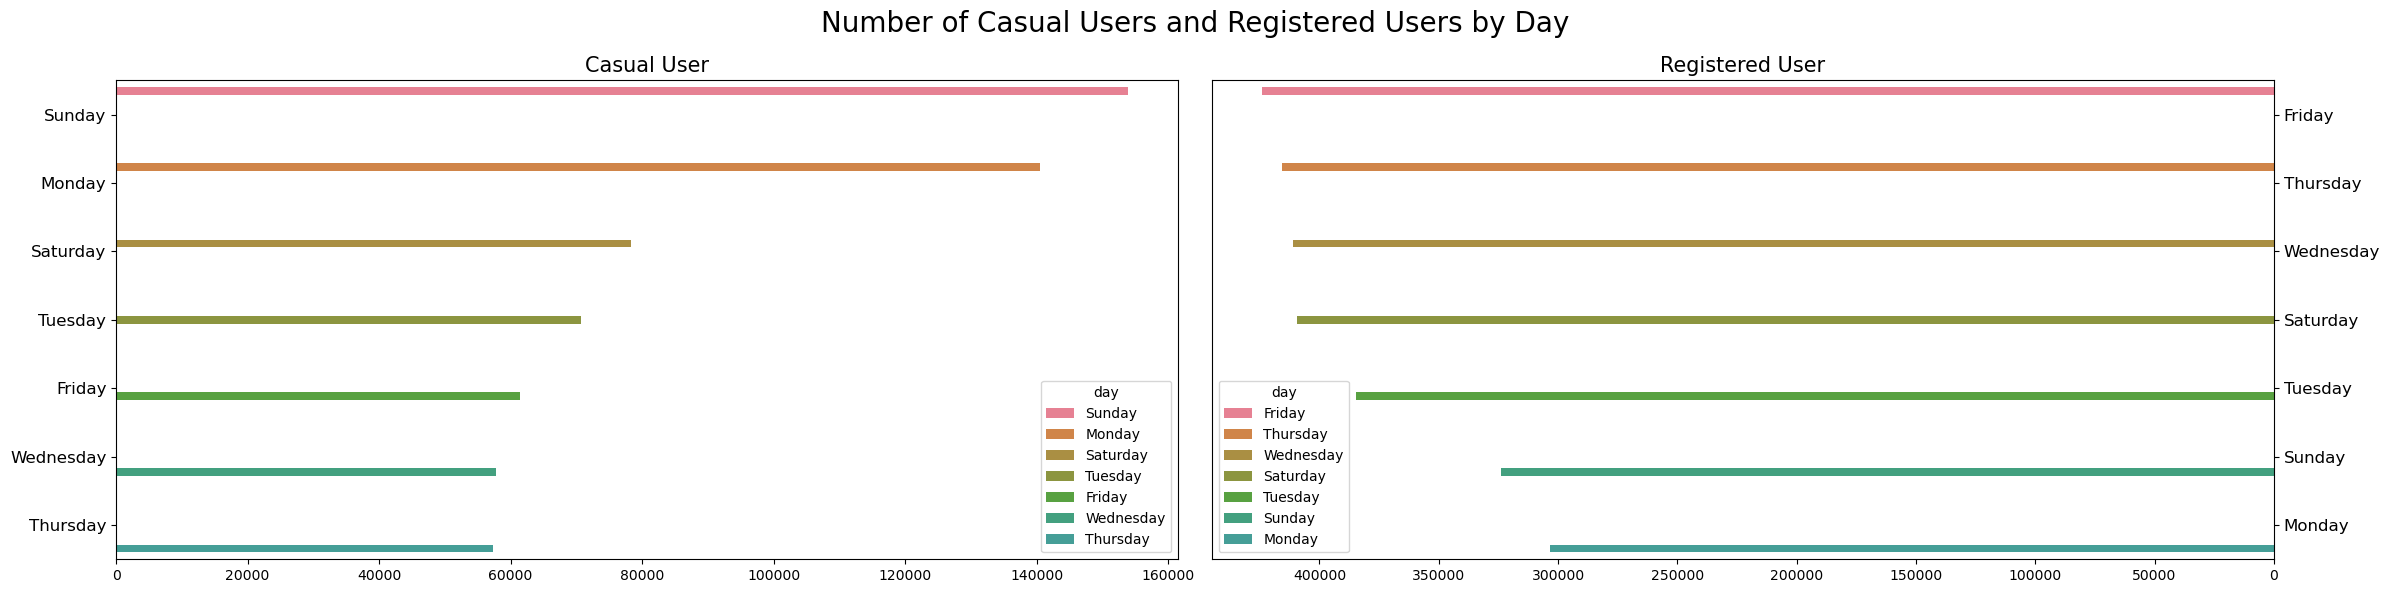

In [266]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = sns.color_palette("husl", 12)

# Plot untuk Casual User
sns.barplot(x="casual_user", y="day", data=sum_casual_user, palette=colors, hue="day", ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Casual User", loc="center", fontsize=15)
ax[0].tick_params(axis='y', labelsize=12)

# Plot untuk Registered User
sns.barplot(x="registered_user", y="day", data=sum_registered_user, hue="day", palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Registered User", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

plt.suptitle("Number of Casual Users and Registered Users by Day", fontsize=20)
plt.tight_layout()
plt.show()

**Jawaban Pertanyaan 1**

Dari visualisasi di atas, terlihat dari 7 hari, pengguna Bike Sharing dengan tipe "Registered User" memiliki jumlah yang lebih banyak dibandingkan dengan tipe "Casual User".

Analisa berdasarkan tipe pengguna: 
- Pengguna tipe "Registered User": Dilihat diagram di atas, hari rabu, kamis dan jumat merupakan hari dengan pengguna tertinggi dari registered user yang artinya registered user menggunakan layanan Bike Sharing untuk kegiatan sehari-hari mereka dengan total 1.250.930 pengguna.

- Pengguna tipe "Casual User": Dilihat diagram di atas, hari sabtu, minggu dan senin merupakan hari dengan pengguna tertinggi dari casual user yang artinya banyak casual user yang menggunakan layanan Bike Sharing untuk kegiatan rekreasi dihari libur dengan total 372.611 pengguna.

Secara keseluruhan, registered user memiliki jumlah yang lebih besar setiap harinya, yang menunjukkan bahwa banyak pengguna yang berlangganan atau secara konsisten menggunakan layanan Bike Sharing.

### Pertanyaan 2: Penggunaan Bike Sharing Selama 24 Jam pada 12 Bulan

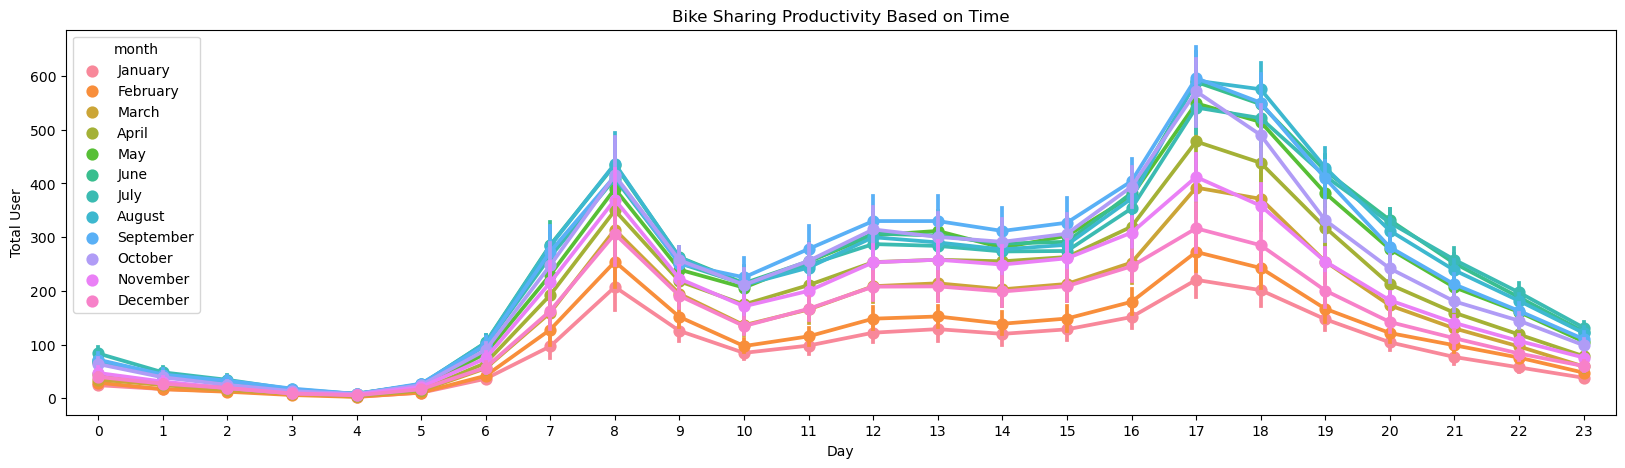

In [272]:
fig, ax = plt.subplots(figsize=(20,5))
sns.pointplot(data=hour, x='hour', y='total_user', hue='month', errorbar=None, ax=ax)
ax.set(title='Bike Sharing Productivity Based on Time')
ax.set_ylabel('Total User')
ax.set_xlabel('Day') 
plt.show()


**Jawaban Pertanyaan 2**

Dari visualisasi di atas, terlihat jumlah pengguna Bike Sharing mengalami peningkatan terbesar yaitu dari jam 4 pagi sampai jam 8 pagi atau pada waktu berangkat dan stabil dari jam 10 pagi sampai 16 sore. Kemudian mengalami kenaikan pada pukul 16 sore dan kemudian mengalami penurunan sampai dengan jam 00.00 atau pada waktu pulang. Dan dapat dilihat pengguna paling sedikit terdapat pada bulan januari dan pengguna paling banyak terdapat pada bulan agustus.

### Pertanyaan 3: Pengaruh Cuaca dan Musim pada Jumlah Pengguna Bike Sharing

In [268]:
byweather = day.groupby("weather").total_user.sum().sort_values(ascending=False).reset_index()
byweather

,weather,total_user
0,Clear,2257952
1,Mist,996858
2,Light Snow,37869


In [269]:
byseason = day.groupby("season").total_user.sum().sort_values(ascending=False).reset_index()
byseason

,season,total_user
0,Fall,1061129
1,Summer,918589
2,Winter,841613
3,Spring,471348


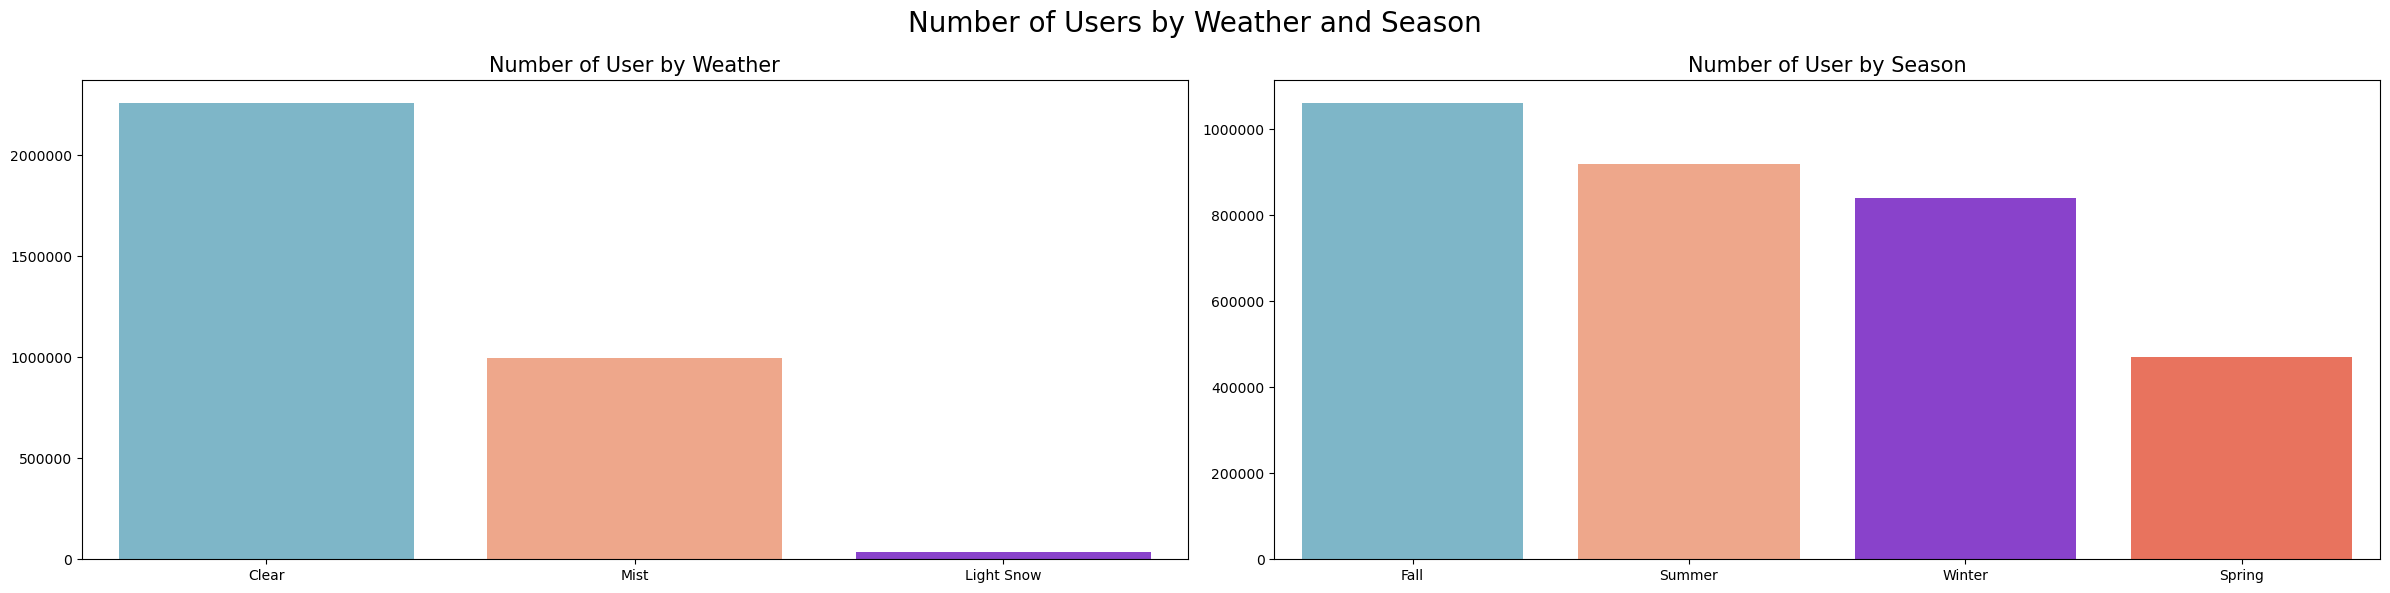

In [271]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))
colors = ["#72BCD4", "#FFA07A", "#8A2BE2", "#FF6347"]

sns.barplot(y="total_user", x="weather", data=byweather.sort_values(by="total_user", ascending=False), palette=colors, ax=ax[0])
ax[0].set_title("Number of User by Weather", loc="center", fontsize=15)
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].ticklabel_format(style='plain', axis='y')

sns.barplot(y="total_user", x="season", data=byseason.sort_values(by="total_user", ascending=False), palette=colors, ax=ax[1])
ax[1].set_title("Number of User by Season", loc="center", fontsize=15)
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].ticklabel_format(style='plain', axis='y')

plt.suptitle("Number of Users by Weather and Season", fontsize=20)
plt.tight_layout()
plt.show()


**Jawaban Pertanyaan 3**

Berdasarkan grafik untuk jumlah pengguna berdasarkan cuaca, terlihat bahwa kondisi cuaca memiliki dampak signifikan terhadap jumlah pengguna Bike Sharing. Penggunaan tertinggi terjadi saat cuaca cerah ("clear") dengan total 2.257.952 pengguna. Dan pengguna terendah terjadi saat cuaca mengalami "light snow" yaitu dengan total 37.869 pengguna Bike Sharing. Penurunan yang signifikan mungkin terjadi karena jalanan yang licin dan udara dingin.

Berdasarkan grafik untuk jumlah pengguna berdasarkan musim, terlihat bahwa kondisi musim memiliki dampak signifikan terhadap jumlah pengguna Bike Sharing. Penggunaan tertinggi terjadi saat musim "fall" dan diikuti musim "summer" dengan total 1.979.718 pengguna. Kemudian terjadi penurunan saat musim "winter" dengan total 841.613 pengguna dan musim "spring" dengan total 471.348 pengguna. Penurunan terjadi kemungkinan diakibatkan oleh suhu yang dingin atau angin yang kencang dan jalanan licin yang tidak aman untuk pengguna sepeda. 

## RFM Analysis

In [223]:
rfm_df = day.groupby(by="month", as_index=False).agg({
    "date": "max", 
    "instant": "nunique", 
    "total_user": "sum" 
})

rfm_df.columns = ["month", "max_order_timestamp", "frequency", "monetary"]

# calculates when the customer last made a transaction (days)
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = day["date"].dt.date.max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)

rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
rfm_df

,month,frequency,monetary,recency
0,April,60,269094,245
1,August,62,351194,122
2,December,62,211036,0
3,February,57,151352,306
4,January,62,134933,335
5,July,62,344948,153
6,June,60,346342,184
7,March,62,228920,275
8,May,62,331686,214
9,November,60,254831,31


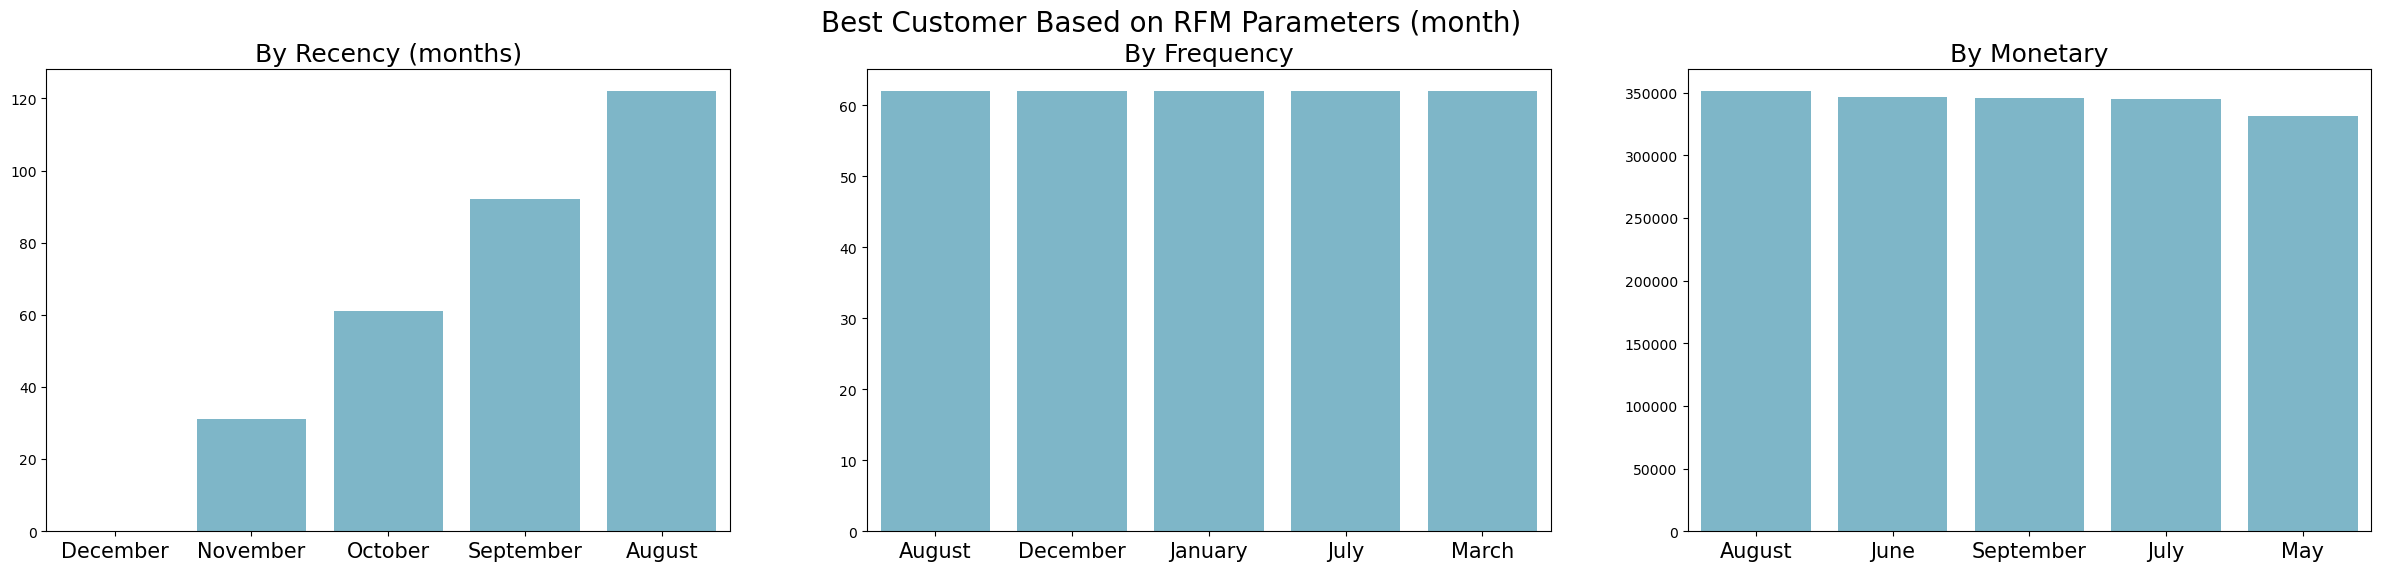

In [224]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

# Plot pertama (Recency)
sns.barplot(y="recency", x="month", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (months)", loc="center", fontsize=18)
ax[0].tick_params(axis='x', labelsize=15)

# Plot kedua (Frequency)
sns.barplot(y="frequency", x="month", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)

# Plot ketiga (Monetary)
sns.barplot(y="monetary", x="month", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)

plt.suptitle("Best Customer Based on RFM Parameters (month)", fontsize=20)
plt.show()


## Conclusion

- **Jumlah Registered User lebih banyak dibandingkan Casual User**: Selainnya jumlahnya yang banyak, registered user juga lebih konsisten menggunakan Bike Sharing dibandingkan Casual User. Registered user menggunakan layanan Bike Sharing untuk kegiatan sehari-hari sedangkan casual user menggunakan layanan Bike Sharing untuk kegiatan rekreasi di akhir pekan.
- **Jumlah Penggunaan Bike Sharing yang Stabil selama 24 Jam dalam 12 Bulan**: Yang menandakan bahwa baik registered user maupun casual user hampir memiliki rutinitas yang sama selama 24 jam dalam 12 bulan. Dimana terdapat peningkatan penggunaan Bike Sharing diwaktu berangkat dan pulang kerja. 
- **Saat Cuaca Cerah Bike Sharing menjadi Pilihan**: Terdapat ketimpangan yang signifikan dalam jumlah pengguna saat cuaca cerah dan saat cuaca turun salju. Hal ini diakibatkan saat turun salju, udara menjadi dingin dan jalanan menjadi licin yang tidak aman bagi pengguna sepeda sehingga saat cuaca turun salju penggunaan Bike Sharing mengalami penurunan yang drastis karena pengguna beralih ke mode transportasi lain.
- **Pengaruh Musim pada jumlah Pengguna**: Dari keempat musim, musim gugur dan musim panas merupakan musim dengan jumlah pengguna Bike Sharing terbanyak. Sedangkan saat musim semi dan musim dingin jumlah pengguna mengalami penurunan signifikan yang diakibatkan oleh suhu yang dingin atau angin kencang, dan jalanan yang licin yang tidak aman bagi pengguna sepeda. Sehingga mengakibatkan pengguna berpindah ke mode transportasi lain.

### Export Clean Dataset

In [225]:
day.to_csv("dashboard/day_clean.csv", index=False)
hour.to_csv("dashboard/hour_clean.csv", index=False)

- Mengeskpor data "day.csv" dan "hour.csv" yang telah diproses dan dibersihkan ke dalam file CSV baru, yaitu "day_clean.csv" dan "hour_clean.csv", di folder **dashboard**. File ini akan menjadi sumber dataset yang digunakan untuk visualisasi data yang ditampilkan di dashboard Streamlit.